<a href="https://colab.research.google.com/github/DikshaGul/Diksha-Gulati/blob/main/SeeColorsDay8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()


Saving Screenshot (9).png to Screenshot (9).png


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

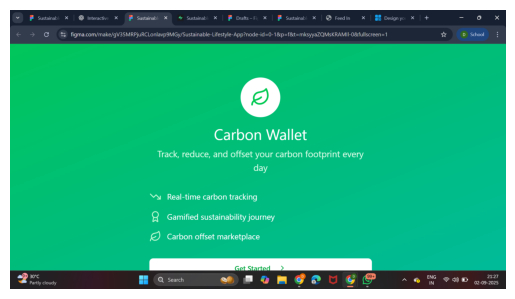

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(list(uploaded.keys())[0])
plt.imshow(img)
plt.axis('off')


In [7]:
import numpy as np

x = 50
y = 50

pixel = np.array(img)[y, x]
pixel


array([ 23,  32,  48, 255], dtype=uint8)

I've loaded a random image , the program takes input , save the image and gets the RGB , later I'm gonna work with providing exact names and matching the grade to make the colours acesible to the colourblinds.

In [8]:
!pip install webcolors

import webcolors


In [9]:
print("Pixel from Day 1:", pixel)


Pixel from Day 1: [ 23  32  48 255]


In [10]:
def closest_color(rgb):
    rgb = rgb[:3]

    min_distance = float('inf')
    closest_name = None


    for name in webcolors.names("css3"):
        r_c, g_c, b_c = webcolors.name_to_rgb(name)
        distance = (r_c - rgb[0])**2 + (g_c - rgb[1])**2 + (b_c - rgb[2])**2

        if distance < min_distance:
            min_distance = distance
            closest_name = name

    return closest_name


In [11]:
color_name = closest_color(pixel)
print("RGB:", pixel[:3])
print("Closest Color Name:", color_name)


RGB: [23 32 48]
Closest Color Name: lightgray


/tmp/ipython-input-3955635234.py:10: RuntimeWarning: overflow encountered in scalar add
  distance = (r_c - rgb[0])**2 + (g_c - rgb[1])**2 + (b_c - rgb[2])**2
/tmp/ipython-input-3955635234.py:10: RuntimeWarning: overflow encountered in scalar subtract
  distance = (r_c - rgb[0])**2 + (g_c - rgb[1])**2 + (b_c - rgb[2])**2


Till now SeeColors is able to

1.   Get the image from user
2. Extract pixel-level RGB values from the image

1.   Convert RGB values into nearest CSS3 color names

TECH STACK

1.   Python
- NumPy
- PIL (Pillow)
- Matplotlib
- WebColors
- Google Colab

 Planned Improvements

- Extract dominant colors from images
- Color palette visualization
- Color-blind accessibility mode
- Web-based interface
- Integration into a personal portfolio website

Status
Actively under development (daily updates)














In [12]:
import matplotlib.pyplot as plt


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

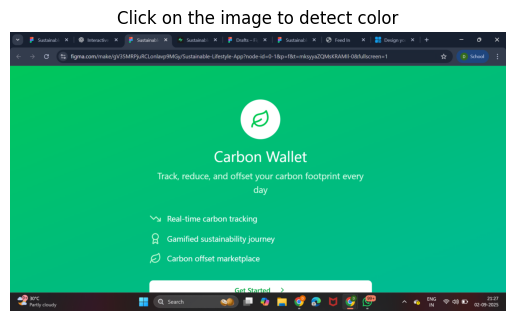

In [13]:
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title("Click on the image to detect color")
ax.axis("off")


In [14]:
def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        x = int(event.xdata)
        y = int(event.ydata)


In [15]:
        clicked_pixel = np.array(img)[y, x][:3].astype(int)


In [16]:
        color_name = closest_color(clicked_pixel)


In [40]:
        print(f"Clicked at (x={x}, y={y})")
        print("RGB:", clicked_pixel)
        print("Closest Color Name:", color_name)
        print("-" * 40)


Clicked at (x=50, y=50)
RGB: [23 32 48]
Closest Color Name: darkslategray
----------------------------------------


In [18]:
cid = fig.canvas.mpl_connect("button_press_event", onclick)
plt.show()

Implemented click-based color detection

Enabled dynamic RGB extraction from images

Improved usability and accessibility focus

In [19]:
from sklearn.cluster import KMeans

In [20]:
small_img = img.resize((150, 150))

In [21]:
import numpy as np

In [22]:
pixels = np.array(small_img)
pixels = pixels.reshape(-1, 3)

In [23]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pixels)

dominant_colors = kmeans.cluster_centers_.astype(int)
dominant_colors


array([[ 63, 226,  61],
       [254,   9, 163],
       [ 43,  47,  58],
       [198, 138, 252],
       [ 47,  59, 254]])

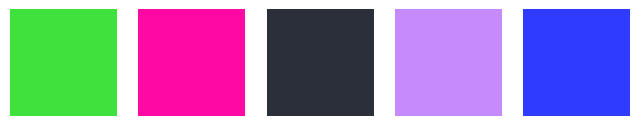

In [24]:
plt.figure(figsize=(8, 2))

for i, color in enumerate(dominant_colors):
    plt.subplot(1, 5, i + 1)
    plt.imshow([[color]])
    plt.axis("off")

plt.show()

In [25]:
for color in dominant_colors:
    name = closest_color(color)
    print(f"RGB: {color} → Closest Color Name: {name}")


RGB: [ 63 226  61] → Closest Color Name: limegreen
RGB: [254   9 163] → Closest Color Name: deeppink
RGB: [43 47 58] → Closest Color Name: darkslategray
RGB: [198 138 252] → Closest Color Name: violet
RGB: [ 47  59 254] → Closest Color Name: royalblue


In [26]:
def luminance(rgb):
    r, g, b = rgb / 255.0
    return 0.2126 * r + 0.7152 * g + 0.0722 * b

In [27]:
def contrast_ratio(color_a, color_b):
    L1 = luminance(color_a)
    L2 = luminance(color_b)

    lighter = max(L1, L2)
    darker = min(L1, L2)

    return (lighter + 0.05) / (darker + 0.05)

In [28]:
print("Accessibility contrast check between dominant colors:\n")

for i in range(len(dominant_colors)):
    for j in range(i + 1, len(dominant_colors)):
        ratio = contrast_ratio(dominant_colors[i], dominant_colors[j])

        if ratio < 4.5:
            print(
                f"Low contrast: "
                f"{closest_color(dominant_colors[i])} & "
                f"{closest_color(dominant_colors[j])} "
                f"(ratio: {ratio:.2f})"
            )

Accessibility contrast check between dominant colors:

Low contrast: limegreen & deeppink (ratio: 2.26)
Low contrast: limegreen & darkslategray (ratio: 3.22)
Low contrast: limegreen & violet (ratio: 1.12)
Low contrast: limegreen & royalblue (ratio: 2.31)
Low contrast: deeppink & darkslategray (ratio: 1.42)
Low contrast: deeppink & violet (ratio: 2.02)
Low contrast: deeppink & royalblue (ratio: 1.02)
Low contrast: darkslategray & violet (ratio: 2.88)
Low contrast: darkslategray & royalblue (ratio: 1.40)
Low contrast: violet & royalblue (ratio: 2.06)


- Analyzes color contrast between dominant colors
- Identifies low-contrast combinations using accessibility standards

In [29]:
def brightness(rgb):
    r, g, b = rgb
    return (0.299*r + 0.587*g + 0.114*b)

In [30]:
def classify_color(rgb):
    b = brightness(rgb)

    if b < 85:
        return "Dark color"
    elif b < 170:
        return "Medium brightness color"
    else:
        return "Light color"

In [31]:
for color in dominant_colors:
    name = closest_color(color)
    category = classify_color(color)
    print(f"RGB: {color} → {name} → {category}")

RGB: [ 63 226  61] → limegreen → Medium brightness color
RGB: [254   9 163] → deeppink → Medium brightness color
RGB: [43 47 58] → darkslategray → Dark color
RGB: [198 138 252] → violet → Medium brightness color
RGB: [ 47  59 254] → royalblue → Dark color


Analyzed color brightness to enable future visibility warnings

In [32]:
import numpy as np
PROTANOPIA = np.array([
    [0.56667, 0.43333, 0.0],
    [0.55833, 0.44167, 0.0],
    [0.0,     0.24167, 0.75833]
])

DEUTERANOPIA = np.array([
    [0.625, 0.375, 0.0],
    [0.7,   0.3,   0.0],
    [0.0,   0.3,   0.7]
])

In [33]:
def simulate_colorblindness(image, matrix):
    img_array = np.array(image.convert("RGB")) / 255.0
    simulated = img_array @ matrix.T
    simulated = np.clip(simulated, 0, 1)
    return (simulated * 255).astype(np.uint8)

In [34]:
protanopia_img = simulate_colorblindness(img, PROTANOPIA)
deuteranopia_img = simulate_colorblindness(img, DEUTERANOPIA)

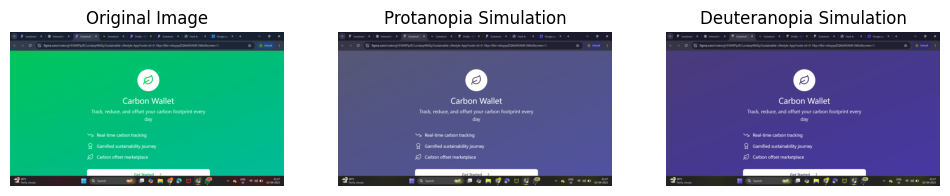

In [35]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Protanopia Simulation")
plt.imshow(protanopia_img)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Deuteranopia Simulation")
plt.imshow(deuteranopia_img)
plt.axis("off")

plt.show()

In [36]:
def accessibility_note():
    return (
        "Some colors may appear very similar to users with color vision deficiency. "
        "This visualization helps identify areas where color contrast may need improvement."
    )

In [37]:
print("Accessibility Insight:")
print(accessibility_note())

Accessibility Insight:
Some colors may appear very similar to users with color vision deficiency. This visualization helps identify areas where color contrast may need improvement.


Analyze dominant colors and detect low-contrast combinations to support color accessibility


In [38]:
def accessibility_summary(dominant_colors):
    low_contrast_pairs = 0

    for i in range(len(dominant_colors)):
        for j in range(i + 1, len(dominant_colors)):
            ratio = contrast_ratio(dominant_colors[i], dominant_colors[j])
            if ratio < 4.5:
                low_contrast_pairs += 1

    if low_contrast_pairs == 0:
        return "No major contrast issues detected. Colors are mostly distinguishable."
    elif low_contrast_pairs <= 3:
        return "Some color combinations may be hard to distinguish."
    else:
        return "High accessibility risk: multiple low-contrast color combinations detected."

In [39]:
print("Accessibility Summary:")
print(accessibility_summary(dominant_colors))

Accessibility Summary:
High accessibility risk: multiple low-contrast color combinations detected.


In [41]:
def visibility_note(rgb):
    b = brightness(rgb)

    if b < 85:
        return "May be hard to see on dark backgrounds"
    elif b > 170:
        return "May be hard to see on light backgrounds"
    else:
        return "Generally visible in most conditions"

In [42]:
print("\nPer-color visibility notes:\n")

for color in dominant_colors:
    name = closest_color(color)
    note = visibility_note(color)
    print(f"{name} ({color}) → {note}")


Per-color visibility notes:

limegreen ([ 63 226  61]) → Generally visible in most conditions
deeppink ([254   9 163]) → Generally visible in most conditions
darkslategray ([43 47 58]) → May be hard to see on dark backgrounds
violet ([198 138 252]) → Generally visible in most conditions
royalblue ([ 47  59 254]) → May be hard to see on dark backgrounds


Generate accessibility warnings using contrast and brightness analysis